This notebook is used for plotting the figures present in the paper

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rcParams

from matplotlib import font_manager
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

from ComptonSpec_classic import Trajectory, Spectrum
from utils_simulation import *
from utils_analytics import *

<ipython-input-1-e5f1e02e1aa3>:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
rcParams['mathtext.fontset'] = 'cm'
rcParams["font.family"] = 'Times New Roman'

hfont = {'fontname':'Times New Roman'}

legend_font = font_manager.FontProperties(family='Times New Roman',
                                          weight='normal',
                                          style='normal',
                                          stretch='ultra-expanded',
                                          size=22)

## Load all data

In [3]:
folder_sim_tau_2 = 'data/simulation/tau_2'
data = load_data_fixed_tau(folder_sim_tau_2)
w_a0_list_tau_2, N_ph_a0_list_tau_2 = data[:2]
beta_arr_tau_2, a0_arr_tau_2, N_max_beta_a0_tau_2, beta_optimal_tau_2 = data[2:]
N_max_NCS_tau_2 = np.load(folder_sim_tau_2 + '/Nmax_NCS.npy')

folder_th_tau_2 = 'data/analytics/tau_2'
data = load_analytics_fixed_tau(folder_th_tau_2)
beta_arr_th_tau_2, a0_arr_th_tau_2, beta_cusp_tau_2 = data[0], data[1], data[2]
beta_Pe_tau_2, w_Pe_tau_2 = data[3], data[4]
beta_Taylor_tau_2, w_Taylor_tau_2 = data[5], data[6]

folder_sim_tau_4 = 'data/simulation/tau_4'
data = load_data_fixed_tau(folder_sim_tau_4)
w_a0_list_tau_4, N_ph_a0_list_tau_4 = data[:2]
beta_arr_tau_4, a0_arr_tau_4, N_max_beta_a0_tau_4, beta_optimal_tau_4 = data[2:]
N_max_NCS_tau_4 = np.load(folder_sim_tau_4 + '/Nmax_NCS.npy')

folder_th_tau_4 = 'data/analytics/tau_4'
data = load_analytics_fixed_tau(folder_th_tau_4)
beta_arr_th_tau_4, a0_arr_th_tau_4, beta_cusp_tau_4 = data[0], data[1], data[2]
beta_Pe_tau_4, w_Pe_tau_4 = data[3], data[4]
beta_Taylor_tau_4, w_Taylor_tau_4 = data[5], data[6]

folder_sim_tau_6 = 'data/simulation/tau_6'
data = load_data_fixed_tau(folder_sim_tau_6)
w_a0_list_tau_6, N_ph_a0_list_tau_6 = data[:2]
beta_arr_tau_6, a0_arr_tau_6, N_max_beta_a0_tau_6, beta_optimal_tau_6 = data[2:]
N_max_NCS_tau_6 = np.load(folder_sim_tau_6 + '/Nmax_NCS.npy')
N_max_NCS_0_tau_6 = np.load(folder_sim_tau_6 + '/Nmax_NCS_0.npy')

folder_th_tau_6 = 'data/analytics/tau_6'
data = load_analytics_fixed_tau(folder_th_tau_6)
beta_arr_th_tau_6, a0_arr_th_tau_6, beta_cusp_tau_6 = data[0], data[1], data[2]
beta_Pe_tau_6, w_Pe_tau_6 = data[3], data[4]
beta_Taylor_tau_6, w_Taylor_tau_6 = data[5], data[6]

folder_sim_tau_6_lin = 'data/simulation/linear/tau_6'
data = load_data_fixed_tau(folder_sim_tau_6_lin)
w_a0_list_tau_6_lin, N_ph_a0_list_tau_6_lin = data[:2]
beta_arr_tau_6_lin, a0_arr_tau_6_lin, N_max_beta_a0_tau_6_lin, beta_optimal_tau_6_lin = data[2:]
N_max_NCS_tau_6_lin = np.load(folder_sim_tau_6_lin + '/Nmax_NCS.npy')
# N_max_NCS_0_tau_6_lin = np.load(folder_sim_tau_6_lin + '/Nmax_NCS_0.npy')



folder_optimal = 'data/simulation/optimal_spectra/tau_6'
w_tau_6 = np.load(folder_optimal + '/w.npy')
w_L_tau_6 = np.load(folder_optimal + '/w_L.npy')
w_NCS_tau_6 = np.load(folder_optimal + '/w_NCS.npy')
N_ph_tau_6 = np.load(folder_optimal + '/N_ph.npy')
N_ph_NCS_tau_6 = np.load(folder_optimal + '/N_ph_NCS.npy')
N_ph_linear_tau_6 = np.load(folder_optimal + '/N_ph_linear.npy')
N_ph_collimated_tau_6 = np.load(folder_optimal + '/N_ph_w_L_collimated.npy')
N_ph_collimated_tau_6_NCS = np.load(folder_optimal + '/N_ph_w_L_collimated_NCS.npy')

### Figure 1. Spectral gauss laser pulses and their spectra for different chirp parameters

In [51]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 2 * np.pi    # Pulse duration
a0 = 1.5             # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
beta_arr = [0, 4]            # Chirp parameter
polarization = 'circular'
wb = [0.,1.5]

A_list, eta_list, w_list, I_list, N_ph_list = [], [], [], [], []
eta_b = 4*tau*np.sqrt(1+beta_arr[-1]**2)
for beta in beta_arr:
    # Define laser phase grid and calculate vector potential
    # eta_b = 4.4*tau*np.sqrt(1+beta**2)
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau, a0, beta)
    u, r = traj.calc_u_x(A, eta)
    eta_list.append(eta)
    A_list.append(A)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    theta = np.pi
    phi = 0
    I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi)
    idx = (w >= wb[0]) & (w <= wb[1])
    w_list.append(w[idx])
    I_list.append(I[idx])
    N_ph = I[idx] / w[idx] / 137
    N_ph_list.append(N_ph)

<ipython-input-51-e0aec8dff5d9>:32: RuntimeWarning: invalid value encountered in true_divide
  N_ph = I[idx] / w[idx] / 137


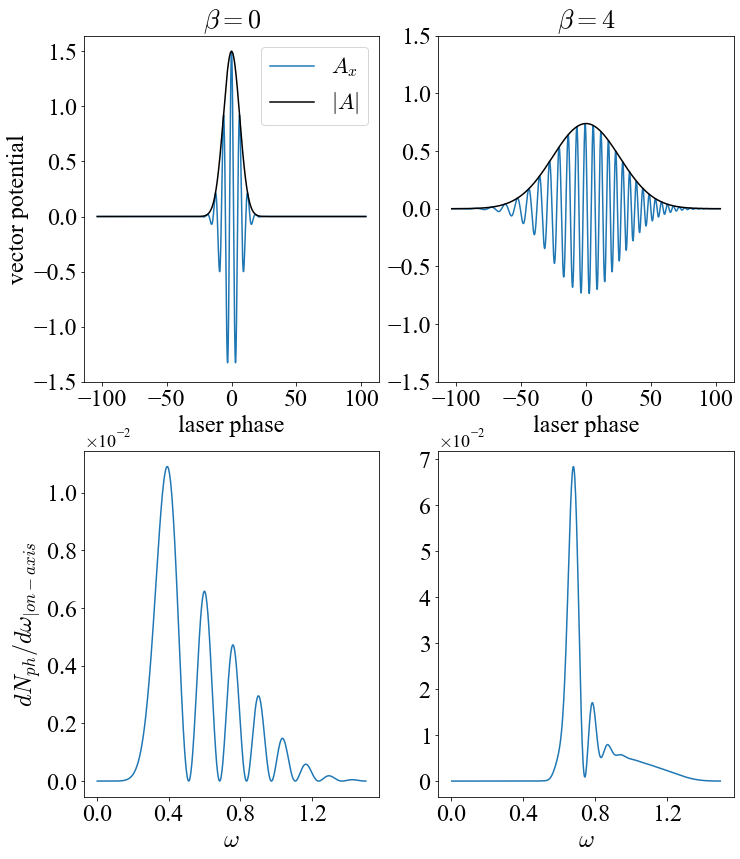

In [54]:
fig, axs = plt.subplots(figsize=(18,14))

for i in range(len(beta_arr)):
    A = A_list[i]
    A_mod = np.sqrt(A[0]**2 + A[1]**2)
    plt.subplot(2,3,i+1)
    plt.plot(eta_list[i], A[0], label='$A_x$')
    # plt.plot(eta_list[i], A[1], label='$A_y$')
    plt.plot(eta_list[i], A_mod, label='$|A|$', color='black')
    plt.title(f'$\\beta = {beta_arr[i]}$', fontsize=26)
    if i == 0:
        plt.legend(loc='best', prop=legend_font)
        plt.ylabel('vector potential', fontsize=24)
    plt.xlabel('laser phase', fontsize=24)
    plt.xticks([-100, -50, 0, 50, 100], fontsize=24)
    plt.yticks([-1.5, -1.0, -0.5, 0., 0.5, 1.0, 1.5], fontsize=24)
    
    ax = plt.subplot(2,3,3+i+1)
    plt.plot(w_list[i], N_ph_list[i])
    plt.xlabel('$\omega$', fontsize=24)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    ax.yaxis.offsetText.set_fontsize(18)
    if i == 0:
        plt.ylabel('$d N_{ph}/d\omega_{|on-axis}$', fontsize=24)
    plt.xticks([0, 0.4, 0.8, 1.2], fontsize=24)
    plt.yticks(fontsize=24)
    
plt.show()

### Figure 2. $\beta(a_0)$ + 2d colormap as background

In [114]:
tau = 4*np.pi
a0 = 2

if tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4.copy()
    beta_cusp = beta_cusp_tau_4.copy()
    w_Pe = w_Pe_tau_4.copy()
    beta_Pe = beta_Pe_tau_4.copy()
    beta_Taylor = beta_Taylor_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()

idx_Taylor = (a0_arr_th > 0.87)
idx = np.where(np.isclose(a0_arr, a0))[0][0]
idx_th = np.where(np.isclose(a0_arr_th, a0))[0][0]

# Choose patch width/height
width = 1.25
height = 24

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear

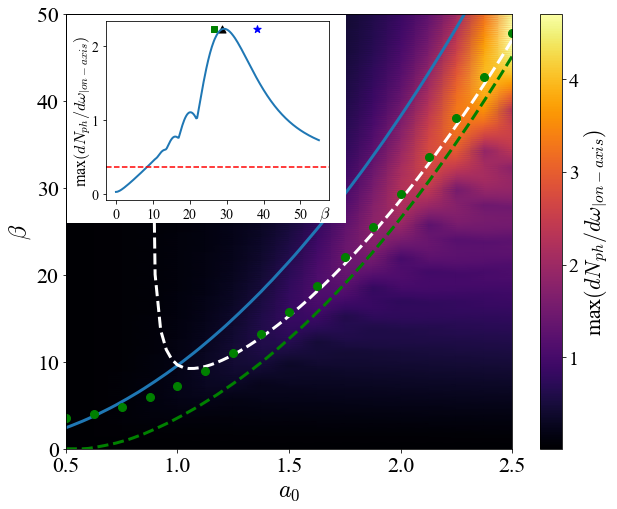

In [115]:
fig, ax = plt.subplots(figsize=(10,8))

# plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0/N_max_beta_a0.max(), cmap='inferno',
#               shading='gouraud')
plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0, cmap='inferno',
              shading='gouraud')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)

plt.plot(a0_arr_th, beta_cusp, color='tab:blue', linewidth=3, label='cusp-on-axis')
plt.plot(a0_arr_th, beta_Pe, '--', color='green', linewidth=3, label='Pearcey max')
plt.plot(a0_arr_th[idx_Taylor], beta_Taylor[idx_Taylor], '--', color='white', linewidth=3, label='Taylor correction')

plt.plot(a0_arr, beta_optimal, 'o', color='green', markersize=8, label='simulation')

ax.set_ylim([0,50])
# plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.yticks(fontsize=22)


ax.add_patch(Rectangle((a0_arr[0]+0.005, 50-height), width, height-0.17,
                        linewidth=1, edgecolor=None,facecolor='white', zorder=3))

axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(0.0, .48, 1, .55),
                   bbox_transform=ax.transAxes, loc=3, borderpad=4)

y_pos = np.max(N_max_beta_a0[:,idx])

axins.plot(beta_arr, N_max_beta_a0[:,idx], linewidth=2)
axins.axhline(Nmax_linear[idx], linestyle='--', color='red')
plt.scatter(beta_cusp[idx_th], y_pos, color='blue', marker='*', s=60, label='cusp-on-axis')
plt.scatter(beta_Pe[idx_th], y_pos, color='green', marker='s', s=30, label='Pearcey max')
plt.scatter(beta_Taylor[idx_th], y_pos, color='black', marker='^', s=50, label='Taylor correction')

axins.set_xticks([0,10,20,30,40,50])
axins.set_yticks([0,1,2])
axins.tick_params(axis='both', which='major', labelsize=14)
plt.text(55, -0.323, '$\\beta$', fontsize=16)
axins.set_ylabel('max$(d N_{ph}/d\omega_{|on-axis})$', labelpad=0., fontsize=16)


plt.show()

### Figure 3. $N_{max} (a_0)$ enchancement of chirped case over linear Compton 

In [142]:
tau = 6*np.pi

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()
    
    w = w_tau_6.copy()
    w_L = w_L_tau_6.copy()
    w_NCS = w_NCS_tau_6.copy()
    N_ph = N_ph_tau_6.copy()
    N_ph_linear = N_ph_linear_tau_6.copy()
    N_ph_NCS = N_ph_NCS_tau_6.copy()
    N_ph_collimated = N_ph_collimated_tau_6.copy()
    N_ph_collimated_NCS = N_ph_collimated_tau_6_NCS.copy()
    Nmax_NCS = N_max_NCS_tau_6.copy()
    Nmax_NCS_0 = N_max_NCS_0_tau_6.copy()
elif tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    
    Nmax_NCS = N_max_NCS_tau_4.copy()
elif tau == 2*np.pi:
    a0_arr = a0_arr_tau_2.copy()
    beta_arr = beta_arr_tau_2.copy()
    beta_arr_th = beta_arr_th_tau_2
    N_max_beta_a0 = N_max_beta_a0_tau_2.copy()
    a0_arr_th = a0_arr_th_tau_2.copy()
    beta_optimal = beta_optimal_tau_2.copy()
    
    Nmax_NCS = N_max_NCS_tau_2.copy()

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


a0 = 2
idx = np.where(np.isclose(a0_arr, a0))[0][0]
increase = Nmax_optimal[idx] / Nmax_linear[idx]
increase_NCS = Nmax_optimal[idx] / Nmax_NCS[idx]
print(increase)
print(increase_NCS)

8.61928457351383
1.8449745056726727


In [143]:
beta_star = beta_optimal[idx]
print(f'bandwidth: {1 / tau}')
print(f'optimal beta: {beta_star}')
print(f'GDD: {64*beta_star}')

bandwidth: 0.05305164769729845
optimal beta: 48.0
GDD: 3072.0


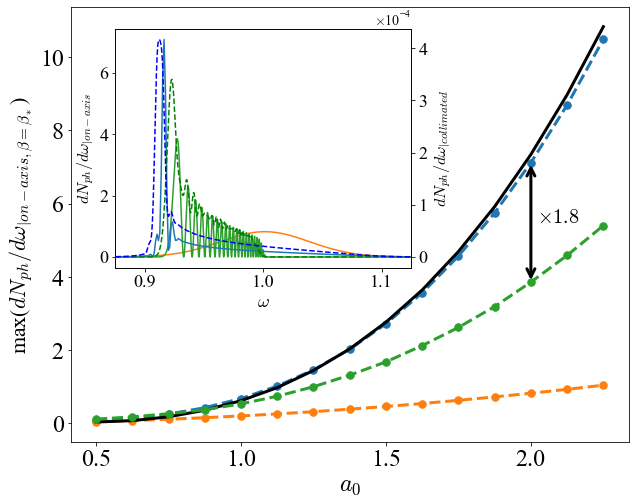

In [145]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
plt.plot(a0_arr, Nmax_optimal, '--.', color='tab:blue', linewidth=3, markersize=15, label='optimal from simulation')
plt.plot(a0_arr, Nmax_linear, '--.', color='tab:orange', linewidth=3, markersize=15, label='linear Compton limit')
plt.plot(a0_arr, Nmax_estimation, '-', color='black', linewidth=3, label='analytics estimation')
plt.plot(a0_arr, Nmax_NCS, '--.', color='tab:green', linewidth=3, markersize=15, label='NCS')
# plt.plot(a0_arr, Nmax_NCS_0, '--.', color='tab:purple', linewidth=3, markersize=15, label='NCS_0')
# plt.title('$\\tau = 6\pi$', fontsize=20)

ax.annotate('', xy=(a0,Nmax_optimal[idx]), xytext=(a0,Nmax_NCS[idx]),
            arrowprops={'arrowstyle':'<->', 'lw':3, 'color':'black', 'ls':'-',
                        'mutation_scale':20})
plt.text(a0+0.02, 0.5*(Nmax_optimal[idx] + Nmax_NCS[idx]), 
         '$\\times 1.8$', fontsize=20)

plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|on-axis,\\beta=\\beta_*}$)', fontsize=22)
# plt.legend(loc='best', fontsize=22)
plt.xticks([0.5, 1, 1.5, 2], fontsize=24)
plt.yticks(fontsize=24)

zoom_ax = ax.inset_axes([0.08, .4, 0.53, .55])

zoom_ax.plot(w, N_ph, color='tab:blue', zorder=5)
zoom_ax.plot(w, N_ph_linear, color='tab:orange')
zoom_ax.plot(w_NCS, N_ph_NCS, color='tab:green', zorder=3)
zoom_ax.set_xlim([0.875,1.125])
zoom_ax.set_xlabel('$\omega$', fontsize=18)
zoom_ax.set_ylabel('$dN_{ph}/d\omega_{|on-axis}$', fontsize=16)
zoom_ax.set_xticks([0.9, 1.0, 1.1], fontsize=16)
zoom_ax.set_yticks([0, 2, 4, 6], fontsize=16)
zoom_ax.tick_params(axis='both', which='major', labelsize=18)

twin_ax = zoom_ax.twinx()
twin_ax.set_xlim(zoom_ax.get_xlim())

twin_ax.plot(w_L, N_ph_collimated, '--', color='blue', zorder=4)
twin_ax.plot(w_L, N_ph_collimated_NCS, '--', color='green', zorder=2)
twin_ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
twin_ax.set_ylabel('$dN_{ph}/d\omega_{|collimated}$', fontsize=16)
twin_ax.tick_params(axis='y', which='major', labelsize=18)
twin_ax.yaxis.offsetText.set_fontsize(14)


plt.show()

In [139]:
# calculate bandwidth for uncollimated spectra on inset plot
w_average = np.sum(w * N_ph) / np.sum(N_ph)
w_sq = np.sqrt(np.sum((w - w_average)**2 * N_ph) / np.sum(N_ph))
bw = w_sq / w_average
print(f"Average w for optimal chirp: {w_average}")
print(f"rms for optimal chirp: {w_sq}")
print(f"bw for optimal chirp: {bw}")
print()

w_average = np.sum(w * N_ph_linear) / np.sum(N_ph_linear)
w_sq = np.sqrt(np.sum((w - w_average)**2 * N_ph_linear) / np.sum(N_ph_linear))
bw = w_sq / w_average
print(f"Average w for linear case: {w_average}")
print(f"rms for linear case: {w_sq}")
print(f"bw for linear case: {bw}")
print()

w_average = np.sum(w_NCS * N_ph_NCS) / np.sum(N_ph_NCS)
w_sq = np.sqrt(np.sum((w_NCS - w_average)**2 * N_ph_NCS) / np.sum(N_ph_NCS))
bw = w_sq / w_average
print(f"Average w for NCS case: {w_average}")
print(f"rms for NCS case: {w_sq}")
print(f"bw for NCS case: {bw}")
print()

Average w for optimal chirp: 0.946698682915534
rms for optimal chirp: 0.04422857025675047
bw for optimal chirp: 0.04671874066681955

Average w for linear case: 1.001407238661699
rms for linear case: 0.03748677554882718
bw for linear case: 0.03743409684048746

Average w for NCS case: 0.9457568265508324
rms for NCS case: 0.021473304857502745
bw for NCS case: 0.022704890152171267



In [133]:
print(1 / (6*np.pi*np.sqrt(2)))

0.037513179839879424


In [59]:
from scipy.optimize import curve_fit

def f(a0, C, k):
    return C * a0**k

popt_optimal, pcov_optimal = curve_fit(f, a0_arr, Nmax_optimal)
popt_NCS, pcov_NCS = curve_fit(f, a0_arr, Nmax_NCS)

In [60]:
print(popt_NCS)
print(popt_optimal)

[0.53221237 2.85545614]
[0.70501083 3.3315465 ]


NameError: name 'f' is not defined

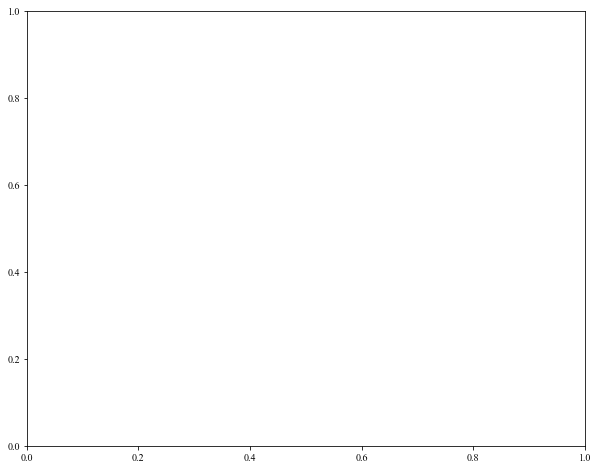

In [140]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
plt.plot(a0_arr, f(a0_arr, popt_optimal[0], popt_optimal[1]), color='blue')
plt.plot(a0_arr, Nmax_optimal, '--.', color='tab:blue', linewidth=3, markersize=15, label='optimal from simulation')
plt.plot(a0_arr, Nmax_linear, '--.', color='tab:orange', linewidth=3, markersize=15, label='linear Compton limit')
plt.plot(a0_arr, Nmax_estimation, '-', color='black', linewidth=3, label='analytics estimation')

plt.plot(a0_arr, f(a0_arr, popt_NCS[0], popt_NCS[1]), color='green')
plt.plot(a0_arr, Nmax_NCS, '--.', color='tab:green', linewidth=3, markersize=15, label='NCS')

ax.annotate('', xy=(a0,Nmax_optimal[idx]), xytext=(a0,Nmax_NCS[idx]),
            arrowprops={'arrowstyle':'<->', 'lw':3, 'color':'black', 'ls':'-',
                        'mutation_scale':20})
plt.text(a0+0.02, 0.5*(Nmax_optimal[idx] + Nmax_NCS[idx]), 
         '$\\times 1.8$', fontsize=20)

plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|\\beta=\\beta_*}$)', fontsize=22)
# plt.legend(loc='best', fontsize=22)
plt.xticks([0.5, 1, 1.5, 2], fontsize=24)
plt.yticks(fontsize=24)

zoom_ax = ax.inset_axes([0.08, .4, 0.53, .55])

zoom_ax.plot(w, N_ph, color='tab:blue')
zoom_ax.plot(w, N_ph_linear, color='tab:orange')
zoom_ax.plot(w_NCS, N_ph_NCS, color='tab:green')
zoom_ax.set_xlim([0.8,1.2])
zoom_ax.set_xlabel('$\omega$', fontsize=18)
zoom_ax.set_ylabel('$dN_{ph}/d\omega_{|on-axis}$', fontsize=16)
zoom_ax.set_xticks([0.8, 0.9, 1.0, 1.1, 1.2], fontsize=16)
zoom_ax.set_yticks([0, 2, 4, 6], fontsize=16)
zoom_ax.tick_params(axis='both', which='major', labelsize=18)

twin_ax = zoom_ax.twinx()
twin_ax.set_xlim(zoom_ax.get_xlim())

twin_ax.plot(w_L, N_ph_collimated, '--', color='black')
twin_ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
twin_ax.set_ylabel('$dN_{ph}/d\omega_{|collimated}$', fontsize=16)
twin_ax.tick_params(axis='y', which='major', labelsize=18)
twin_ax.yaxis.offsetText.set_fontsize(14)


plt.show()

### Figure 4. $N_{max} (\beta)$ for fixed $a_0, \tau$

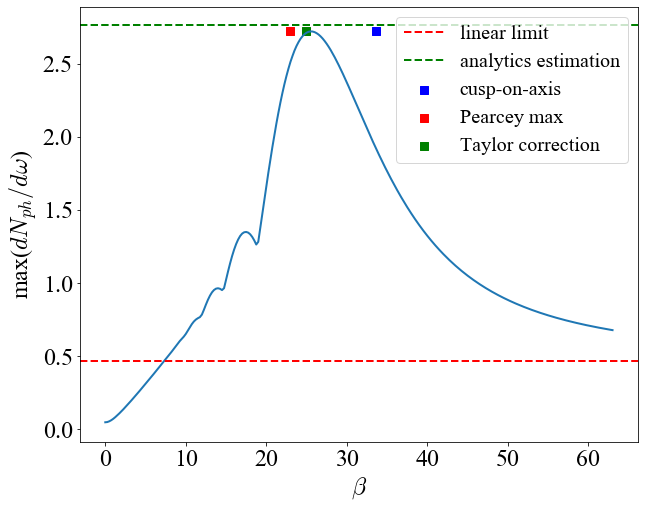

In [173]:
tau = 6*np.pi
a0 = 1.5

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()

idx = np.where(np.isclose(a0_arr, a0))[0][0]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(beta_arr, N_max_beta_a0[:,idx], linewidth=2)
y_pos = np.max(N_max_beta_a0[:,idx])

# plt.scatter(beta_optimal[idx], y_pos, color='orange', marker='*', s=200)
plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', s=80, label='cusp-on-axis')
plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', s=80, label='Pearcey max')
plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', s=80, label='Taylor correction')

ax.axhline(Nmax_linear[idx], linestyle='--', color='red', linewidth=2, label='linear limit')
ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', linewidth=2, label='analytics estimation')

plt.xlabel('$\\beta$', fontsize=24)
plt.ylabel('max($dN_{ph}/d\omega$)', fontsize=24)
# plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

### Figure 5. $\beta(\omega)$ folds and cusp + predictions

In [5]:
tau = 4*np.pi
a0 = 2

if tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    N_ph_a0_list = N_ph_a0_list_tau_4
    w_a0_list = w_a0_list_tau_4
elif tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()
    N_ph_a0_list = N_ph_a0_list_tau_6
    w_a0_list = w_a0_list_tau_6

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

idx = np.where(np.isclose(a0_arr, a0))[0][0]

idx_beta, idx_w = np.where(N_ph_a0_list[idx] == N_ph_a0_list[idx].max())
beta_fold, w_fold = calculate_fold_w_beta(beta_arr, a0_arr[idx],
                                          tau, eps=3e-2)

In [6]:
def solve_fold_equation(phi_arr, beta, a0=1, tau=2*np.pi):
    '''
    Calculate error for the fold equation for an array of laser phase phi_arr
    '''
    a_sq = 2*a0**2 / np.sqrt(1 + beta**2)
    tau_eff = tau * np.sqrt(1 + beta**2)
    prefactor = a_sq * np.exp(-(phi_arr/tau_eff)**2)
    lhs = (2*phi_arr*(1 + beta*phi_arr/tau_eff**2) + beta) * prefactor
    rhs = -2*beta
    err = np.abs(lhs - rhs)
    return err


def calculate_w_on_fold(phi_fold, beta, a0=1, tau=2*np.pi):
    '''
    Calculate frequency on fold (for spesified array phi_fold)
    '''
    a_sq = 2*a0**2 / np.sqrt(1 + beta**2)
    tau_eff = tau * np.sqrt(1 + beta**2)
    w_L = 1 + beta*phi_fold/tau_eff**2
    w = w_L / (1 + 0.5*a_sq*np.exp(-(phi_fold/tau_eff)**2))
    return w

def calculate_fold_left_right(beta_arr, a0=1, tau=2*np.pi, eps=3e-2):
    beta_left, beta_right = [], []
    w_left, w_right = [], []
    for i,beta in enumerate(beta_arr):
        phi_b = 3*tau*np.sqrt(1+beta**2)
        phi_arr = np.linspace(-phi_b, phi_b, int(2*phi_b*500))
        err = solve_fold_equation(phi_arr, beta, a0, tau)
        idx_phi = (err < eps)
        phi_fold = phi_arr[idx_phi]
        
        if len(phi_fold) > 0:
            idx_left = (phi_fold < np.mean(phi_fold))
            idx_right = (phi_fold > np.mean(phi_fold))
            if np.sum(idx_left) > 0:
                phi_left = phi_fold[idx_left][0]
                w = calculate_w_on_fold(phi_left, beta, a0, tau)
                beta_left.append(beta)
                w_left.append(w)
            if np.sum(idx_right) > 0:
                phi_right = phi_fold[idx_right][0]
                w = calculate_w_on_fold(phi_right, beta, a0, tau)
                beta_right.append(beta)
                w_right.append(w)
    return np.array(beta_left), np.array(w_left), np.array(beta_right), np.array(w_right)

In [7]:
beta_left, w_left, beta_right, w_right = calculate_fold_left_right(beta_arr, a0, tau)

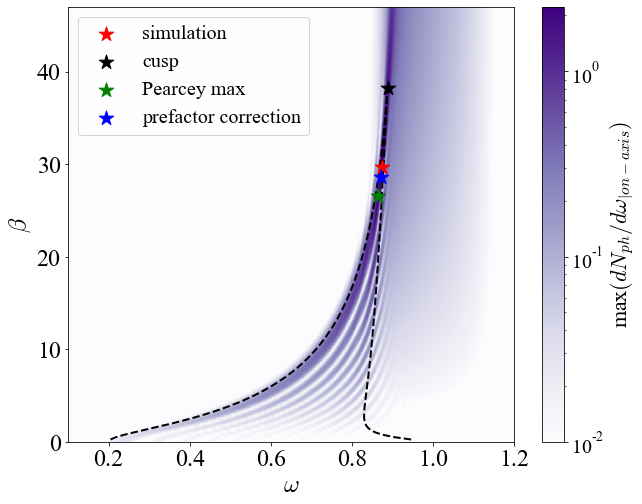

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
# plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
#                cmap='inferno', shading='gouraud')
plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
               cmap='Purples', shading='gouraud', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)
plt.clim(1e-2)

# plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
# plt.plot(w_left, beta_left, '--', color='white', linewidth=2, zorder=1)
# plt.plot(w_right, beta_right, '--', color='white', linewidth=2, zorder=1)
plt.plot(w_left, beta_left, '--', color='black', linewidth=2, zorder=1)
plt.plot(w_right, beta_right, '--', color='black', linewidth=2, zorder=1)

plt.scatter(w_a0_list[idx][idx_w[0]], beta_arr[idx_beta[0]], color='red', marker='*', s=230, zorder=2, label='simulation')
# plt.scatter(w_cusp[idx], beta_cusp[idx], color='white', marker='*', s=230, zorder=2, label='cusp')
plt.scatter(w_cusp[idx], beta_cusp[idx], color='black', marker='*', s=230, zorder=2, label='cusp')
plt.scatter(w_Pe[idx], beta_Pe[idx], color='green', marker='*', s=230, zorder=2, label='Pearcey max')
plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='blue', marker='*', s=230, zorder=2, label='prefactor correction')

ax.set_xlim([0.1, 1.2])
ax.set_ylim([0., 47.])
# plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
plt.xlabel('$\omega$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=20)
plt.show()

## Supplemental Material figures

## Laser pulses with different chirp parameters

In [127]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 2 * np.pi    # Pulse duration
a0 = 1.5             # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
beta_arr = [0, 2, 4]            # Chirp parameter
polarization = 'circular'
wb = [0.,1.5]

A_list, eta_list, w_list, I_list, N_ph_list = [], [], [], [], []
eta_b = 4*tau*np.sqrt(1+beta_arr[-1]**2)
for beta in beta_arr:
    # Define laser phase grid and calculate vector potential
    # eta_b = 4.4*tau*np.sqrt(1+beta**2)
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau, a0, beta)
    u, r = traj.calc_u_x(A, eta)
    eta_list.append(eta)
    A_list.append(A)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    theta = np.pi
    phi = 0
    I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi)
    idx = (w >= wb[0]) & (w <= wb[1])
    w_list.append(w[idx])
    I_list.append(I[idx])
    N_ph = I[idx] / w[idx] / 137
    N_ph_list.append(N_ph)

<ipython-input-127-a62cd85d88f9>:32: RuntimeWarning: invalid value encountered in true_divide
  N_ph = I[idx] / w[idx] / 137


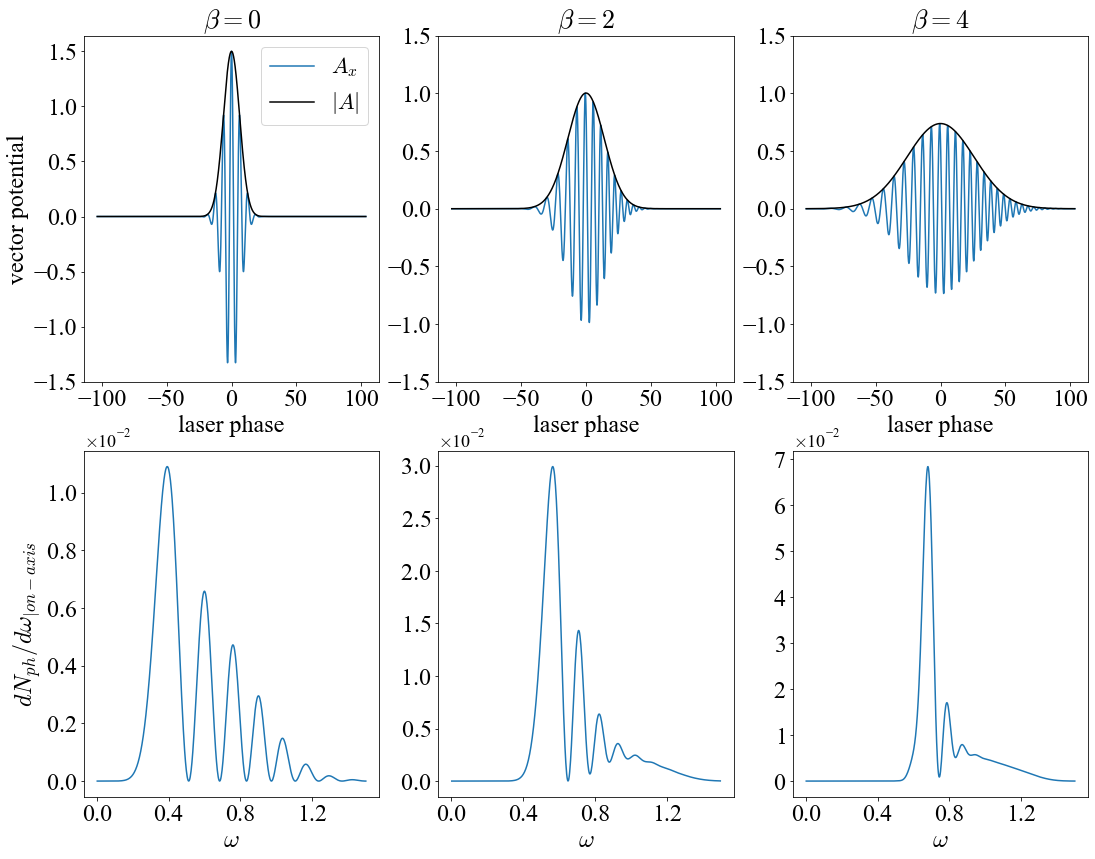

In [129]:
fig, axs = plt.subplots(figsize=(18,14))

for i in range(len(beta_arr)):
    A = A_list[i]
    A_mod = np.sqrt(A[0]**2 + A[1]**2)
    plt.subplot(2,3,i+1)
    plt.plot(eta_list[i], A[0], label='$A_x$')
    # plt.plot(eta_list[i], A[1], label='$A_y$')
    plt.plot(eta_list[i], A_mod, label='$|A|$', color='black')
    plt.title(f'$\\beta = {beta_arr[i]}$', fontsize=26)
    if i == 0:
        plt.legend(loc='best', prop=legend_font)
        plt.ylabel('vector potential', fontsize=24)
    plt.xlabel('laser phase', fontsize=24)
    plt.xticks([-100, -50, 0, 50, 100], fontsize=24)
    plt.yticks([-1.5, -1.0, -0.5, 0., 0.5, 1.0, 1.5], fontsize=24)
    
    ax = plt.subplot(2,3,3+i+1)
    plt.plot(w_list[i], N_ph_list[i])
    plt.xlabel('$\omega$', fontsize=24)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    ax.yaxis.offsetText.set_fontsize(18)
    if i == 0:
        plt.ylabel('$d N_{ph}/d\omega_{|on-axis}$', fontsize=24)
    plt.xticks([0, 0.4, 0.8, 1.2], fontsize=24)
    plt.yticks(fontsize=24)
    
plt.show()

## $(\beta, a_0)$ colormap for different $\tau$

In [13]:
tau = 2*np.pi
a0 = 2.5

if tau == 2*np.pi:
    a0_arr = a0_arr_tau_2.copy()
    beta_arr = beta_arr_tau_2.copy()
    N_max_beta_a0 = N_max_beta_a0_tau_2.copy()
    a0_arr_th = a0_arr_th_tau_2.copy()
    beta_arr_th = beta_arr_th_tau_2.copy()
    beta_cusp = beta_cusp_tau_2.copy()
    w_Pe = w_Pe_tau_2.copy()
    beta_Pe = beta_Pe_tau_2.copy()
    beta_Taylor = beta_Taylor_tau_2.copy()
    beta_optimal = beta_optimal_tau_2.copy()

idx_Taylor = (a0_arr_th > 1.65)
idx = np.where(np.isclose(a0_arr, a0))[0][0]
idx_th = np.where(np.isclose(a0_arr_th, a0))[0][0]

# Choose patch width/height
width = 0.625*(a0_arr[-1] - a0_arr[0])
height = 0.45*beta_arr[-1]

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear

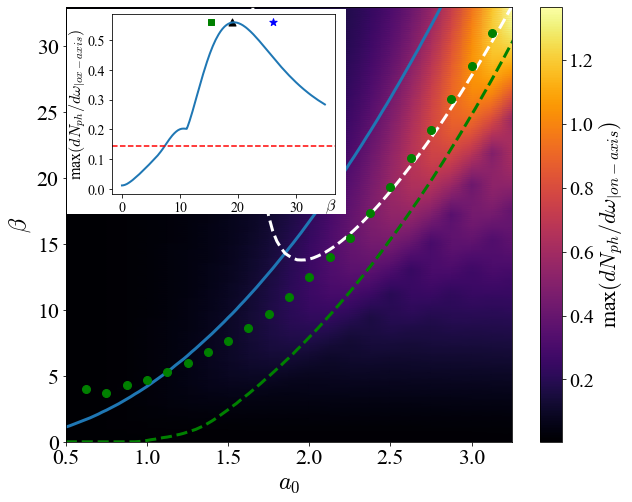

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

# plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0/N_max_beta_a0.max(), cmap='inferno',
#               shading='gouraud')
plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0, cmap='inferno',
              shading='gouraud')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)

plt.plot(a0_arr_th, beta_cusp, color='tab:blue', linewidth=3, label='cusp-on-axis')
plt.plot(a0_arr_th, beta_Pe, '--', color='green', linewidth=3, label='Pearcey max')
plt.plot(a0_arr_th[idx_Taylor], beta_Taylor[idx_Taylor], '--', color='white', linewidth=3, label='Taylor correction')

plt.plot(a0_arr, beta_optimal, 'o', color='green', markersize=8, label='simulation')

ax.set_ylim([0,33])
ax.set_xlim([0.5,3.25])
# plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=22)
plt.yticks(fontsize=22)


ax.add_patch(Rectangle((a0_arr[0]+0.005, 33-height), width, height-0.17,
                        linewidth=1, edgecolor=None,facecolor='white', zorder=3))

axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(0.0, .465, 1, .55),
                   bbox_transform=ax.transAxes, loc=3, borderpad=4.6)

y_pos = np.max(N_max_beta_a0[:,idx])

axins.plot(beta_arr, N_max_beta_a0[:,idx], linewidth=2)
axins.axhline(Nmax_linear[idx], linestyle='--', color='red')
plt.scatter(beta_cusp[idx_th], y_pos, color='blue', marker='*', s=60, label='cusp-on-axis')
plt.scatter(beta_Pe[idx_th], y_pos, color='green', marker='s', s=30, label='Pearcey max')
plt.scatter(beta_Taylor[idx_th], y_pos, color='black', marker='^', s=50, label='Taylor correction')

axins.set_xticks([0,10,20,30])
axins.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
axins.tick_params(axis='both', which='major', labelsize=14)
plt.text(35, -0.072, '$\\beta$', fontsize=16)
axins.set_ylabel('max$(d N_{ph}/d\omega_{|ox-axis})$', labelpad=0., fontsize=16)


plt.show()

In [16]:
tau = 4*np.pi
a0 = 2

if tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4.copy()
    beta_cusp = beta_cusp_tau_4.copy()
    w_Pe = w_Pe_tau_4.copy()
    beta_Pe = beta_Pe_tau_4.copy()
    beta_Taylor = beta_Taylor_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()

idx_Taylor = (a0_arr_th > 0.87)
idx = np.where(np.isclose(a0_arr, a0))[0][0]
idx_th = np.where(np.isclose(a0_arr_th, a0))[0][0]

# Choose patch width/height
# width = 1.25
# height = 24
width = 0.625*(a0_arr[-1] - a0_arr[0])
height = 0.45*beta_arr[-1]

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear

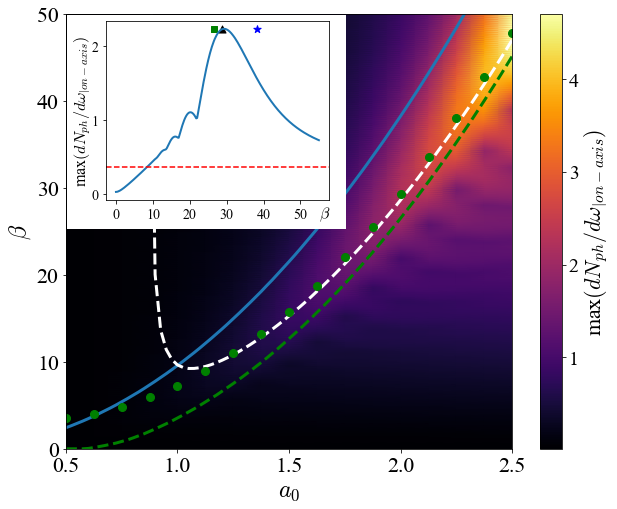

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

# plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0/N_max_beta_a0.max(), cmap='inferno',
#               shading='gouraud')
plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0, cmap='inferno',
              shading='gouraud')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)

plt.plot(a0_arr_th, beta_cusp, color='tab:blue', linewidth=3, label='cusp-on-axis')
plt.plot(a0_arr_th, beta_Pe, '--', color='green', linewidth=3, label='Pearcey max')
plt.plot(a0_arr_th[idx_Taylor], beta_Taylor[idx_Taylor], '--', color='white', linewidth=3, label='Taylor correction')

plt.plot(a0_arr, beta_optimal, 'o', color='green', markersize=8, label='simulation')

ax.set_ylim([0,50])
# plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.yticks(fontsize=22)


ax.add_patch(Rectangle((a0_arr[0]+0.005, 50-height), width, height-0.17,
                        linewidth=1, edgecolor=None,facecolor='white', zorder=3))

axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(0.0, .48, 1, .55),
                   bbox_transform=ax.transAxes, loc=3, borderpad=4)

y_pos = np.max(N_max_beta_a0[:,idx])

axins.plot(beta_arr, N_max_beta_a0[:,idx], linewidth=2)
axins.axhline(Nmax_linear[idx], linestyle='--', color='red')
plt.scatter(beta_cusp[idx_th], y_pos, color='blue', marker='*', s=60, label='cusp-on-axis')
plt.scatter(beta_Pe[idx_th], y_pos, color='green', marker='s', s=30, label='Pearcey max')
plt.scatter(beta_Taylor[idx_th], y_pos, color='black', marker='^', s=50, label='Taylor correction')

axins.set_xticks([0,10,20,30,40,50])
axins.set_yticks([0,1,2])
axins.tick_params(axis='both', which='major', labelsize=14)
plt.text(55, -0.323, '$\\beta$', fontsize=16)
axins.set_ylabel('max$(d N_{ph}/d\omega_{|on-axis})$', labelpad=0., fontsize=16)


plt.show()

In [18]:
tau = 6*np.pi
a0 = 1.5

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6.copy()
    beta_cusp = beta_cusp_tau_6.copy()
    w_Pe = w_Pe_tau_6.copy()
    beta_Pe = beta_Pe_tau_6.copy()
    beta_Taylor = beta_Taylor_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()

idx_Taylor = (a0_arr_th > 0.65)
idx = np.where(np.isclose(a0_arr, a0))[0][0]
idx_th = np.where(np.isclose(a0_arr_th, a0))[0][0]

# Choose patch width/height
width = 0.625*(a0_arr[-1] - a0_arr[0])
height = 0.48*beta_arr[-1]

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear

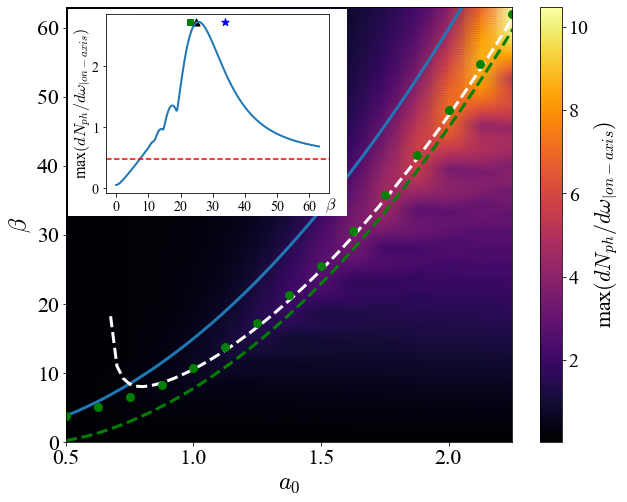

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr, beta_arr, N_max_beta_a0, cmap='inferno',
              shading='gouraud')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)

plt.plot(a0_arr_th, beta_cusp, color='tab:blue', linewidth=3, label='cusp-on-axis')
plt.plot(a0_arr_th, beta_Pe, '--', color='green', linewidth=3, label='Pearcey max')
plt.plot(a0_arr_th[idx_Taylor], beta_Taylor[idx_Taylor], '--', color='white', linewidth=3, label='Taylor correction')

plt.plot(a0_arr, beta_optimal, 'o', color='green', markersize=8, label='simulation')

ax.set_ylim([0,63])
ax.set_xlim([0.5,2.25])
# plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks([0.5, 1.0, 1.5, 2.0], fontsize=22)
plt.yticks(fontsize=22)


ax.add_patch(Rectangle((a0_arr[0]+0.0075, 63-height), width, height-0.34,
                        linewidth=1, edgecolor=None,facecolor='white', zorder=3))

axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(0.0, .48, 1, .55),
                   bbox_transform=ax.transAxes, loc=3, borderpad=4)

y_pos = np.max(N_max_beta_a0[:,idx])

axins.plot(beta_arr, N_max_beta_a0[:,idx], linewidth=2)
axins.axhline(Nmax_linear[idx], linestyle='--', color='red')
plt.scatter(beta_cusp[idx_th], y_pos, color='blue', marker='*', s=60, label='cusp-on-axis')
plt.scatter(beta_Pe[idx_th], y_pos, color='green', marker='s', s=30, label='Pearcey max')
plt.scatter(beta_Taylor[idx_th], y_pos, color='black', marker='^', s=50, label='Taylor correction')

axins.set_xticks([0,10,20,30,40,50,60])
axins.set_yticks([0,1,2])
axins.tick_params(axis='both', which='major', labelsize=14)
plt.text(65, -0.35, '$\\beta$', fontsize=16)
axins.set_ylabel('max$(d N_{ph}/d\omega_{|on-axis})$', labelpad=0., fontsize=16)


plt.show()

## Photon peak enhancement

In [20]:
tau = 2*np.pi

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()
    
    w = w_tau_6.copy()
    w_L = w_L_tau_6.copy()
    w_NCS = w_NCS_tau_6.copy()
    N_ph = N_ph_tau_6.copy()
    N_ph_linear = N_ph_linear_tau_6.copy()
    N_ph_NCS = N_ph_NCS_tau_6.copy()
    N_ph_collimated = N_ph_collimated_tau_6.copy()
    Nmax_NCS = N_max_NCS_tau_6.copy()
elif tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    
    Nmax_NCS = N_max_NCS_tau_4.copy()
elif tau == 2*np.pi:
    a0_arr = a0_arr_tau_2.copy()
    beta_arr = beta_arr_tau_2.copy()
    beta_arr_th = beta_arr_th_tau_2
    N_max_beta_a0 = N_max_beta_a0_tau_2.copy()
    a0_arr_th = a0_arr_th_tau_2.copy()
    beta_optimal = beta_optimal_tau_2.copy()
    
    Nmax_NCS = N_max_NCS_tau_2.copy()

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


a0 = 3
idx = np.where(np.isclose(a0_arr, a0))[0][0]
increase = Nmax_optimal[idx] / Nmax_linear[idx]
increase_NCS = Nmax_optimal[idx] / Nmax_NCS[idx]
print(increase)
print(increase_NCS)

5.051083184530682
1.6023765556006377


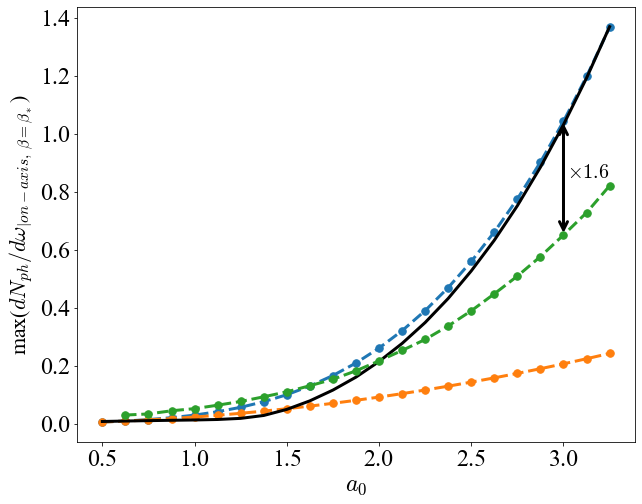

In [21]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
plt.plot(a0_arr, Nmax_optimal, '--.', color='tab:blue', linewidth=3, markersize=15, label='optimal from simulation')
plt.plot(a0_arr, Nmax_linear, '--.', color='tab:orange', linewidth=3, markersize=15, label='linear Compton limit')
plt.plot(a0_arr, Nmax_estimation, '-', color='black', linewidth=3, label='analytics estimation')
plt.plot(a0_arr[1:], Nmax_NCS[1:], '--.', color='tab:green', linewidth=3, markersize=15, label='NCS')
# plt.title('$\\tau = 6\pi$', fontsize=20)

ax.annotate('', xy=(a0,Nmax_optimal[idx]), xytext=(a0,Nmax_NCS[idx]),
            arrowprops={'arrowstyle':'<->', 'lw':3, 'color':'black', 'ls':'-',
                        'mutation_scale':20})
plt.text(a0+0.02, 0.5*(Nmax_optimal[idx] + Nmax_NCS[idx]), 
         '$\\times 1.6$', fontsize=20)

plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|on-axis,\:\\beta=\\beta_*}$)', fontsize=22)
# plt.legend(loc='best', fontsize=22)
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3.], fontsize=24)
plt.yticks(fontsize=24)

# zoom_ax = ax.inset_axes([0.08, .4, 0.53, .55])

# zoom_ax.plot(w, N_ph, color='tab:blue')
# zoom_ax.plot(w, N_ph_linear, color='tab:orange')
# zoom_ax.plot(w_NCS, N_ph_NCS, color='tab:green')
# zoom_ax.set_xlim([0.8,1.2])
# zoom_ax.set_xlabel('$\omega$', fontsize=18)
# zoom_ax.set_ylabel('$dN_{ph}/d\omega_{|on-axis}$', fontsize=16)
# zoom_ax.set_xticks([0.8, 0.9, 1.0, 1.1, 1.2], fontsize=16)
# zoom_ax.set_yticks([0, 2, 4, 6], fontsize=16)
# zoom_ax.tick_params(axis='both', which='major', labelsize=18)

# twin_ax = zoom_ax.twinx()
# twin_ax.set_xlim(zoom_ax.get_xlim())

# twin_ax.plot(w_L, N_ph_collimated, '--', color='black')
# twin_ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# twin_ax.set_ylabel('$dN_{ph}/d\omega_{|collimated}$', fontsize=16)
# twin_ax.tick_params(axis='y', which='major', labelsize=18)
# twin_ax.yaxis.offsetText.set_fontsize(14)


plt.show()

In [22]:
tau = 4*np.pi

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()
    
    w = w_tau_6.copy()
    w_L = w_L_tau_6.copy()
    w_NCS = w_NCS_tau_6.copy()
    N_ph = N_ph_tau_6.copy()
    N_ph_linear = N_ph_linear_tau_6.copy()
    N_ph_NCS = N_ph_NCS_tau_6.copy()
    N_ph_collimated = N_ph_collimated_tau_6.copy()
    Nmax_NCS = N_max_NCS_tau_6.copy()
elif tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    
    Nmax_NCS = N_max_NCS_tau_4.copy()
elif tau == 2*np.pi:
    a0_arr = a0_arr_tau_2.copy()
    beta_arr = beta_arr_tau_2.copy()
    beta_arr_th = beta_arr_th_tau_2
    N_max_beta_a0 = N_max_beta_a0_tau_2.copy()
    a0_arr_th = a0_arr_th_tau_2.copy()
    beta_optimal = beta_optimal_tau_2.copy()
    
    Nmax_NCS = N_max_NCS_tau_2.copy()

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


a0 = 2.25
idx = np.where(np.isclose(a0_arr, a0))[0][0]
increase = Nmax_optimal[idx] / Nmax_linear[idx]
increase_NCS = Nmax_optimal[idx] / Nmax_NCS[idx]
print(increase)
print(increase_NCS)

7.128430821993588
1.7480107796112638


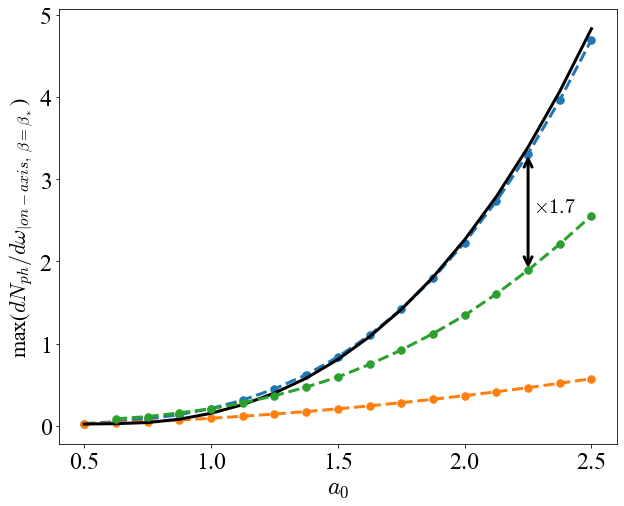

In [23]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
plt.plot(a0_arr, Nmax_optimal, '--.', color='tab:blue', linewidth=3, markersize=15, label='optimal from simulation')
plt.plot(a0_arr, Nmax_linear, '--.', color='tab:orange', linewidth=3, markersize=15, label='linear Compton limit')
plt.plot(a0_arr, Nmax_estimation, '-', color='black', linewidth=3, label='analytics estimation')
plt.plot(a0_arr[1:], Nmax_NCS[1:], '--.', color='tab:green', linewidth=3, markersize=15, label='NCS')
# plt.title('$\\tau = 6\pi$', fontsize=20)

ax.annotate('', xy=(a0,Nmax_optimal[idx]), xytext=(a0,Nmax_NCS[idx]),
            arrowprops={'arrowstyle':'<->', 'lw':3, 'color':'black', 'ls':'-',
                        'mutation_scale':20})
plt.text(a0+0.02, 0.5*(Nmax_optimal[idx] + Nmax_NCS[idx]), 
         '$\\times 1.7$', fontsize=20)

plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|on-axis,\:\\beta=\\beta_*}$)', fontsize=22)
# plt.legend(loc='best', fontsize=22)
plt.xticks([0.5, 1, 1.5, 2, 2.5], fontsize=24)
plt.yticks(fontsize=24)

# zoom_ax = ax.inset_axes([0.08, .4, 0.53, .55])

# zoom_ax.plot(w, N_ph, color='tab:blue')
# zoom_ax.plot(w, N_ph_linear, color='tab:orange')
# zoom_ax.plot(w_NCS, N_ph_NCS, color='tab:green')
# zoom_ax.set_xlim([0.8,1.2])
# zoom_ax.set_xlabel('$\omega$', fontsize=18)
# zoom_ax.set_ylabel('$dN_{ph}/d\omega_{|on-axis}$', fontsize=16)
# zoom_ax.set_xticks([0.8, 0.9, 1.0, 1.1, 1.2], fontsize=16)
# zoom_ax.set_yticks([0, 2, 4, 6], fontsize=16)
# zoom_ax.tick_params(axis='both', which='major', labelsize=18)

# twin_ax = zoom_ax.twinx()
# twin_ax.set_xlim(zoom_ax.get_xlim())

# twin_ax.plot(w_L, N_ph_collimated, '--', color='black')
# twin_ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# twin_ax.set_ylabel('$dN_{ph}/d\omega_{|collimated}$', fontsize=16)
# twin_ax.tick_params(axis='y', which='major', labelsize=18)
# twin_ax.yaxis.offsetText.set_fontsize(14)


plt.show()

In [24]:
tau = 6*np.pi

if tau == 6*np.pi:
    a0_arr = a0_arr_tau_6.copy()
    beta_arr = beta_arr_tau_6.copy()
    beta_arr_th = beta_arr_th_tau_6
    N_max_beta_a0 = N_max_beta_a0_tau_6.copy()
    a0_arr_th = a0_arr_th_tau_6.copy()
    beta_optimal = beta_optimal_tau_6.copy()
    
    w = w_tau_6.copy()
    w_L = w_L_tau_6.copy()
    w_NCS = w_NCS_tau_6.copy()
    N_ph = N_ph_tau_6.copy()
    N_ph_linear = N_ph_linear_tau_6.copy()
    N_ph_NCS = N_ph_NCS_tau_6.copy()
    N_ph_collimated = N_ph_collimated_tau_6.copy()
    Nmax_NCS = N_max_NCS_tau_6.copy()
elif tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    
    Nmax_NCS = N_max_NCS_tau_4.copy()
elif tau == 2*np.pi:
    a0_arr = a0_arr_tau_2.copy()
    beta_arr = beta_arr_tau_2.copy()
    beta_arr_th = beta_arr_th_tau_2
    N_max_beta_a0 = N_max_beta_a0_tau_2.copy()
    a0_arr_th = a0_arr_th_tau_2.copy()
    beta_optimal = beta_optimal_tau_2.copy()
    
    Nmax_NCS = N_max_NCS_tau_2.copy()

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr, tau, beta_Pe, w_Pe, beta_optimal, 
                           beta_arr, N_max_beta_a0)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


a0 = 2.
idx = np.where(np.isclose(a0_arr, a0))[0][0]
increase = Nmax_optimal[idx] / Nmax_linear[idx]
increase_NCS = Nmax_optimal[idx] / Nmax_NCS[idx]
print(increase)
print(increase_NCS)

8.61928457351383
1.8449745056726727


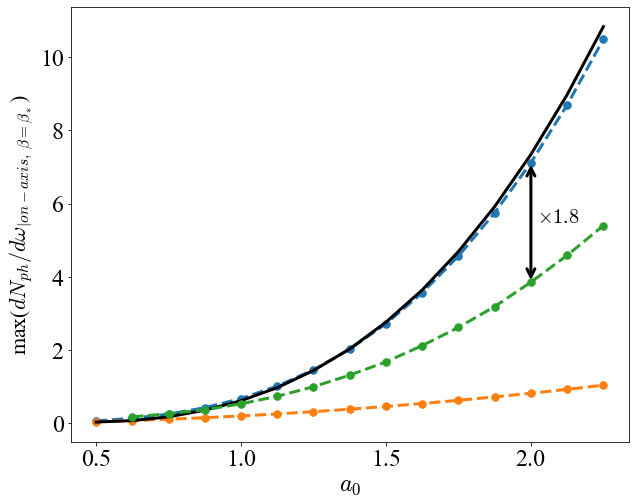

In [25]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
plt.plot(a0_arr, Nmax_optimal, '--.', color='tab:blue', linewidth=3, markersize=15, label='optimal from simulation')
plt.plot(a0_arr, Nmax_linear, '--.', color='tab:orange', linewidth=3, markersize=15, label='linear Compton limit')
plt.plot(a0_arr, Nmax_estimation, '-', color='black', linewidth=3, label='analytics estimation')
plt.plot(a0_arr[1:], Nmax_NCS[1:], '--.', color='tab:green', linewidth=3, markersize=15, label='NCS')
# plt.title('$\\tau = 6\pi$', fontsize=20)

ax.annotate('', xy=(a0,Nmax_optimal[idx]), xytext=(a0,Nmax_NCS[idx]),
            arrowprops={'arrowstyle':'<->', 'lw':3, 'color':'black', 'ls':'-',
                        'mutation_scale':20})
plt.text(a0+0.02, 0.5*(Nmax_optimal[idx] + Nmax_NCS[idx]), 
         '$\\times 1.8$', fontsize=20)

plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|on-axis,\:\\beta=\\beta_*}$)', fontsize=22)
# plt.legend(loc='best', fontsize=22)
plt.xticks([0.5, 1, 1.5, 2], fontsize=24)
plt.yticks(fontsize=24)

# zoom_ax = ax.inset_axes([0.08, .4, 0.53, .55])

# zoom_ax.plot(w, N_ph, color='tab:blue')
# zoom_ax.plot(w, N_ph_linear, color='tab:orange')
# zoom_ax.plot(w_NCS, N_ph_NCS, color='tab:green')
# zoom_ax.set_xlim([0.8,1.2])
# zoom_ax.set_xlabel('$\omega$', fontsize=18)
# zoom_ax.set_ylabel('$dN_{ph}/d\omega_{|on-axis}$', fontsize=16)
# zoom_ax.set_xticks([0.8, 0.9, 1.0, 1.1, 1.2], fontsize=16)
# zoom_ax.set_yticks([0, 2, 4, 6], fontsize=16)
# zoom_ax.tick_params(axis='both', which='major', labelsize=18)

# twin_ax = zoom_ax.twinx()
# twin_ax.set_xlim(zoom_ax.get_xlim())

# twin_ax.plot(w_L, N_ph_collimated, '--', color='black')
# twin_ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# twin_ax.set_ylabel('$dN_{ph}/d\omega_{|collimated}$', fontsize=16)
# twin_ax.tick_params(axis='y', which='major', labelsize=18)
# twin_ax.yaxis.offsetText.set_fontsize(14)


plt.show()

## $\beta(\omega)$ folds and cusp

In [26]:
def solve_fold_equation(phi_arr, beta, a0=1, tau=2*np.pi):
    '''
    Calculate error for the fold equation for an array of laser phase phi_arr
    '''
    a_sq = 2*a0**2 / np.sqrt(1 + beta**2)
    tau_eff = tau * np.sqrt(1 + beta**2)
    prefactor = a_sq * np.exp(-(phi_arr/tau_eff)**2)
    lhs = (2*phi_arr*(1 + beta*phi_arr/tau_eff**2) + beta) * prefactor
    rhs = -2*beta
    err = np.abs(lhs - rhs)
    return err


def calculate_w_on_fold(phi_fold, beta, a0=1, tau=2*np.pi):
    '''
    Calculate frequency on fold (for spesified array phi_fold)
    '''
    a_sq = 2*a0**2 / np.sqrt(1 + beta**2)
    tau_eff = tau * np.sqrt(1 + beta**2)
    w_L = 1 + beta*phi_fold/tau_eff**2
    w = w_L / (1 + 0.5*a_sq*np.exp(-(phi_fold/tau_eff)**2))
    return w

def calculate_fold_left_right(beta_arr, a0=1, tau=2*np.pi, eps=3e-2):
    beta_left, beta_right = [], []
    w_left, w_right = [], []
    for i,beta in enumerate(beta_arr):
        phi_b = 3*tau*np.sqrt(1+beta**2)
        phi_arr = np.linspace(-phi_b, phi_b, int(2*phi_b*500))
        err = solve_fold_equation(phi_arr, beta, a0, tau)
        idx_phi = (err < eps)
        phi_fold = phi_arr[idx_phi]
        
        if len(phi_fold) > 0:
            idx_left = (phi_fold < np.mean(phi_fold))
            idx_right = (phi_fold > np.mean(phi_fold))
            if np.sum(idx_left) > 0:
                phi_left = phi_fold[idx_left][0]
                w = calculate_w_on_fold(phi_left, beta, a0, tau)
                beta_left.append(beta)
                w_left.append(w)
            if np.sum(idx_right) > 0:
                phi_right = phi_fold[idx_right][0]
                w = calculate_w_on_fold(phi_right, beta, a0, tau)
                beta_right.append(beta)
                w_right.append(w)
    return np.array(beta_left), np.array(w_left), np.array(beta_right), np.array(w_right)

In [27]:
tau = 4*np.pi

if tau == 4*np.pi:
    a0_arr = a0_arr_tau_4.copy()
    beta_arr = beta_arr_tau_4.copy()
    beta_arr_th = beta_arr_th_tau_4
    N_max_beta_a0 = N_max_beta_a0_tau_4.copy()
    a0_arr_th = a0_arr_th_tau_4.copy()
    beta_optimal = beta_optimal_tau_4.copy()
    N_ph_a0_list = N_ph_a0_list_tau_4
    w_a0_list = w_a0_list_tau_4

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th, a0_arr, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

In [28]:
a0 = 1
idx = np.where(np.isclose(a0_arr, a0))[0][0]

idx_beta, idx_w = np.where(N_ph_a0_list[idx] == N_ph_a0_list[idx].max())
beta_fold, w_fold = calculate_fold_w_beta(beta_arr, a0_arr[idx],
                                          tau, eps=3e-2)

beta_left, w_left, beta_right, w_right = calculate_fold_left_right(beta_arr, a0, tau)

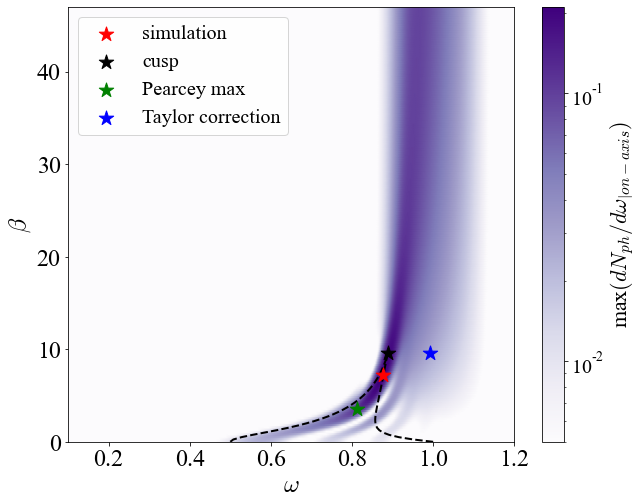

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
# plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
#                cmap='inferno', shading='gouraud')
# plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
#                cmap='Purples', shading='gouraud', norm=matplotlib.colors.LogNorm())
plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
               cmap='Purples', shading='gouraud', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)
plt.clim(5e-3)

# plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
plt.plot(w_left, beta_left, '--', color='black', linewidth=2, zorder=1)
plt.plot(w_right, beta_right, '--', color='black', linewidth=2, zorder=1)

plt.scatter(w_a0_list[idx][idx_w[0]], beta_arr[idx_beta[0]], color='red', marker='*', s=230, zorder=2, label='simulation')
plt.scatter(w_cusp[idx], beta_cusp[idx], color='black', marker='*', s=230, zorder=2, label='cusp')
plt.scatter(w_Pe[idx], beta_Pe[idx], color='green', marker='*', s=230, zorder=2, label='Pearcey max')
plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='blue', marker='*', s=230, zorder=2, label='Taylor correction')

ax.set_xlim([0.1,1.2])
ax.set_ylim([0.,47.])
# plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
plt.xlabel('$\omega$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [34]:
a0 = 1.5
idx = np.where(np.isclose(a0_arr, a0))[0][0]

idx_beta, idx_w = np.where(N_ph_a0_list[idx] == N_ph_a0_list[idx].max())
beta_fold, w_fold = calculate_fold_w_beta(beta_arr, a0_arr[idx],
                                          tau, eps=4e-2)

beta_left, w_left, beta_right, w_right = calculate_fold_left_right(beta_arr, a0, tau)

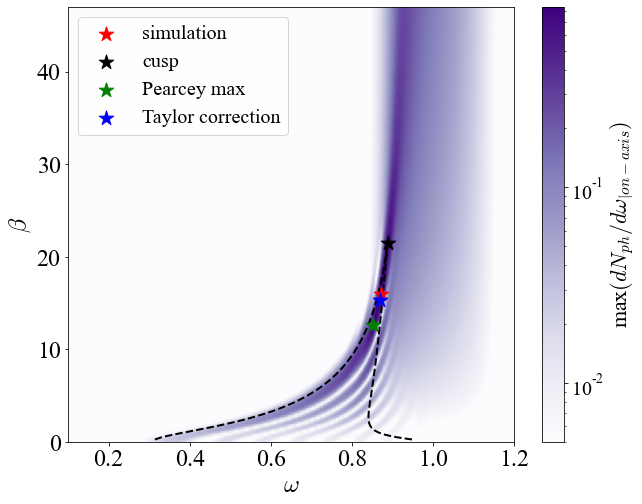

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
# plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
#                cmap='inferno', shading='gouraud')
plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
               cmap='Purples', shading='gouraud', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)
plt.clim(5e-3)

# plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
plt.plot(w_left[1:], beta_left[1:], '--', color='black', linewidth=2, zorder=1)
plt.plot(w_right[1:], beta_right[1:], '--', color='black', linewidth=2, zorder=1)

plt.scatter(w_a0_list[idx][idx_w[0]], beta_arr[idx_beta[0]], color='red', marker='*', s=230, zorder=2, label='simulation')
plt.scatter(w_cusp[idx], beta_cusp[idx], color='black', marker='*', s=230, zorder=2, label='cusp')
plt.scatter(w_Pe[idx], beta_Pe[idx], color='green', marker='*', s=230, zorder=2, label='Pearcey max')
plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='blue', marker='*', s=230, zorder=2, label='Taylor correction')

ax.set_xlim([0.1, 1.2])
ax.set_ylim([0.,47.])
# plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
plt.xlabel('$\omega$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [37]:
a0 = 2
idx = np.where(np.isclose(a0_arr, a0))[0][0]

idx_beta, idx_w = np.where(N_ph_a0_list[idx] == N_ph_a0_list[idx].max())
beta_fold, w_fold = calculate_fold_w_beta(beta_arr, a0_arr[idx],
                                          tau, eps=3e-2)

beta_left, w_left, beta_right, w_right = calculate_fold_left_right(beta_arr, a0, tau)

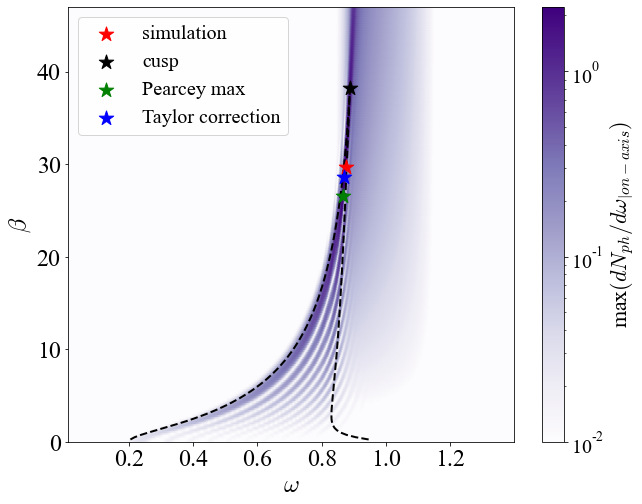

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
# plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
#                cmap='inferno', shading='gouraud')
plt.pcolormesh(w_a0_list[idx], beta_arr, N_ph_a0_list[idx],
               cmap='Purples', shading='gouraud', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('max$(d N_{ph}/d\omega_{|on-axis})$', fontsize=22)
plt.clim(1e-2)

# plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
plt.plot(w_left, beta_left, '--', color='black', linewidth=2, zorder=1)
plt.plot(w_right, beta_right, '--', color='black', linewidth=2, zorder=1)

plt.scatter(w_a0_list[idx][idx_w[0]], beta_arr[idx_beta[0]], color='red', marker='*', s=230, zorder=2, label='simulation')
plt.scatter(w_cusp[idx], beta_cusp[idx], color='black', marker='*', s=230, zorder=2, label='cusp')
plt.scatter(w_Pe[idx], beta_Pe[idx], color='green', marker='*', s=230, zorder=2, label='Pearcey max')
plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='blue', marker='*', s=230, zorder=2, label='Taylor correction')

ax.set_ylim([0.,47.])
# plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
plt.xlabel('$\omega$', fontsize=24)
plt.ylabel('$\\beta$', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=20)
plt.show()

### Linear polarization

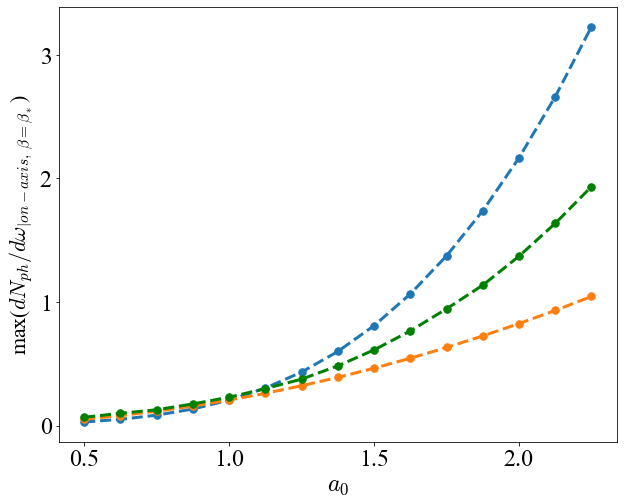

In [51]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 6*np.pi

Nmax_linear = a0_arr_tau_6_lin**2 * tau**2 / 137 / (4*np.pi)

Nmax_optimal = np.zeros_like(a0_arr_tau_6_lin)

for i,a0 in enumerate(a0_arr_tau_6_lin):
    beta0 = beta_optimal_tau_6_lin[i]
    idx_beta0 = np.where(np.isclose(beta_arr_tau_6_lin, beta0))[0][0]
    Nmax_optimal[i] = N_max_beta_a0_tau_6_lin[idx_beta0,i]


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_6_lin, Nmax_optimal, '--.', color='tab:blue', linewidth=3, markersize=15, label='optimal, simulation')
plt.plot(a0_arr_tau_6_lin, Nmax_linear, '--.', color='tab:orange', linewidth=3, markersize=15, label='linear limit')
# plt.plot(a0_arr_tau_6, Nmax_estimation, '-', color='blue', label='analytics estimation')
plt.plot(a0_arr_tau_6_lin, N_max_NCS_tau_6_lin, '--.', color='green', linewidth=3, markersize=15, label='NCS')

# plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=24)
plt.ylabel('max($d N_{ph}/d\omega_{|on-axis,\:\\beta=\\beta_*}$)', fontsize=22)
# plt.legend(loc='best', fontsize=16)
plt.xticks([0.5, 1.0, 1.5, 2.0], fontsize=24)
plt.yticks([0, 1, 2, 3], fontsize=24)
plt.show()

### Teaser image

In [131]:
# Figure for teaser

u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 4 * np.pi    # Pulse duration
a0 = 1.5             # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
# beta_arr = [0, 4]            # Chirp parameter
polarization = 'circular'
wb = [0.01,1.5]

idx_a0 = np.where(np.isclose(a0, a0_arr_tau_4))[0][0]
beta_arr = [0, beta_optimal_tau_4[idx_a0]]

A_list, eta_list, w_list, I_list, N_ph_list = [], [], [], [], []
eta_b = 4*tau*np.sqrt(1+beta_arr[-1]**2)
for beta in beta_arr:
    # Define laser phase grid and calculate vector potential
    # eta_b = 4.4*tau*np.sqrt(1+beta**2)
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau, a0, beta)
    u, r = traj.calc_u_x(A, eta)
    eta_list.append(eta)
    A_list.append(A)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    theta = np.pi
    phi = 0
    I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi)
    idx = (w >= wb[0]) & (w <= wb[1])
    w_list.append(w[idx])
    I_list.append(I[idx])
    N_ph = I[idx] / w[idx] / 137
    N_ph_list.append(N_ph)

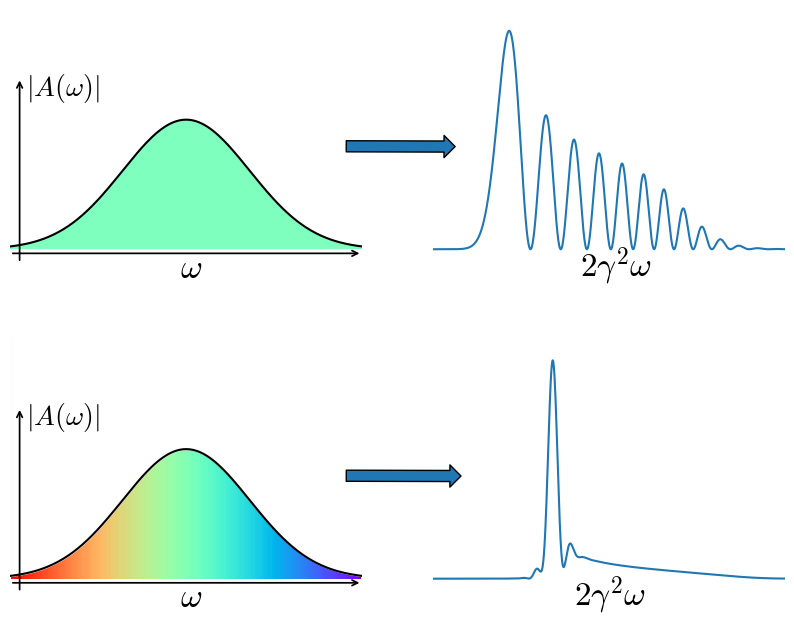

In [161]:
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import ArrowStyle

xlim = 550

fig, axs = plt.subplots(figsize=(10,8), dpi=100)

ax1 = plt.subplot(2,2,1)
A = A_list[-1]
A_mod = np.sqrt(A[0]**2 + A[1]**2)
x = eta_list[-1][::500]
y = A_mod[::500]
plt.plot(x, y, label='$|A|$', color='black')
plt.fill(x, y, facecolor='springgreen', alpha=0.5)
plt.text(-20, -0.08, s="$\omega$", fontsize=24)
plt.text(-500, 0.45, s="$|A(\omega)|$", fontsize=20)
# plt.text(-200, 0.45, s="unchirped", fontsize=26)
ax1.annotate("", xy=(-550, -0.012), xytext=(550, -0.012),
            arrowprops=dict(arrowstyle="<-", linewidth=1.25))
ax1.annotate("", xy=(-520, -0.04), xytext=(-520, 0.5),
            arrowprops=dict(arrowstyle="<-", linewidth=1.25))
ax1.set_xlim([-xlim,xlim])
ax1.set_ylim([-0.1,0.7])
plt.axis('off')

x_max = 550
ax3 = plt.subplot(2,2,3)
A = A_list[-1]
A_mod = np.sqrt(A[0]**2 + A[1]**2)
x = eta_list[-1][::500]
y = A_mod[::500]
idx_x = (x > -x_max) & (x < x_max)
x = x[idx_x]
y = y[idx_x]
plt.plot(x, y, label='$|A|$', color='black')

num_bars = 200
z = np.array([10 - np.arange(len(x)) for i in range(len(x))])
plt.contourf(x, range(len(x)), z, num_bars, cmap='rainbow')
background_color = 'w'
plt.fill_between(x, y, y2=1, color=background_color)
plt.text(-20, -0.08, s="$\omega$", fontsize=24)
plt.text(-500, 0.45, s="$|A(\omega)|$", fontsize=20)
# plt.text(-250, 0.45, s="linear chirp", fontsize=26)
ax3.set_xlim([-xlim,xlim])
ax3.set_ylim([-0.1,0.7])
ax3.annotate("", xy=(-550, -0.012), xytext=(550, -0.012),
            arrowprops=dict(arrowstyle="<-", linewidth=1.25))
ax3.annotate("", xy=(-520, -0.04), xytext=(-520, 0.5),
            arrowprops=dict(arrowstyle="<-", linewidth=1.25))
plt.axis('off')

ax2 = plt.subplot(2,2,2)
plt.plot(w_list[0], N_ph_list[0]/N_ph_list[0].max())
plt.text(0.6, -0.12, s="$2\gamma^2\omega$", fontsize=24)
ax2.set_xlim([0.1,1.3])
ax2.set_ylim([-1.1/7,1.1])
plt.axis('off')

ax4 = plt.subplot(2,2,4)
plt.plot(w_list[1], N_ph_list[1]/N_ph_list[1].max())
plt.text(0.9, -0.12, s="$2\gamma^2\omega$", fontsize=24)
ax4.set_xlim([0.7,1.2])
ax4.set_ylim([-1.1/7,1.1])
plt.axis('off')


xy1 = (500, 0.3)
xy2 = (0.2, 0.47)
con = ConnectionPatch(
    xyA=xy1, coordsA=ax1.transData,
    xyB=xy2, coordsB=ax2.transData,
    arrowstyle=ArrowStyle.Simple(head_length=.8, head_width=1.6, tail_width=.8), shrinkB=5)
fig.add_artist(con)

xy1 = (500, 0.3)
xy2 = (0.75, 0.47)
con = ConnectionPatch(
    xyA=xy1, coordsA=ax3.transData,
    xyB=xy2, coordsB=ax4.transData,
    arrowstyle=ArrowStyle.Simple(head_length=.8, head_width=1.6, tail_width=.8), shrinkB=5)
fig.add_artist(con)

plt.show()